Import libraries

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neural_network import MLPClassifier
import seaborn as sn

Load datasets

In [18]:
# Load the datasets A2-ring-separable.txt, A2-ring-merged.txt, A2-ring-test.txt as train_separable, train_merged, test_data respectively.
train_separable = pd.read_csv('A2-ring-separable.txt', sep='\t', header=None)
train_merged = pd.read_csv('A2-ring-merged.txt', sep='\t', header=None)
test_data = pd.read_csv('A2-ring-test.txt', sep='\t', header=None)

# Separate features and target variable
X_train_separable = train_separable.iloc[:, :-1].values
y_train_separable = train_separable.iloc[:, -1].values

X_train_merged = train_merged.iloc[:, :-1].values
y_train_merged = train_merged.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

Use GridSearch to automate the process of looking for the best parameters

In [19]:
# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(64,), (32,)],
    'activation': ['relu', 'logistic'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.001, 0.01],
    'max_iter': [100]
}

# Create MLPClassifier
mlp_model = MLPClassifier()

# Create GridSearchCV with 5-fold cross-validation
grid_search_merged = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_separable = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search for Separable Ring Data
grid_search_separable.fit(X_train_separable, y_train_separable)
# Perform grid search for Merged Ring Data
grid_search_merged.fit(X_train_merged, y_train_merged)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_separable.best_params_)
print("Best Parameters: ", grid_search_merged.best_params_)

print("Best Accuracy: ", grid_search_merged.best_score_)
print("Best Accuracy: ", grid_search_separable.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/joan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/joan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/joan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/joan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/joan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/joan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

Best Parameters:  {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (32,), 'max_iter': 100, 'solver': 'lbfgs'}
Best Parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (64,), 'max_iter': 100, 'solver': 'lbfgs'}
Best Accuracy:  0.7805
Best Accuracy:  0.9890000000000001


/home/joan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Use the best parameters for training and calculate the accuracy

In [20]:
# Use the best model for further evaluation
best_model_separable = grid_search_separable.best_estimator_
best_model_merged = grid_search_merged.best_estimator_

# Evaluate the model
accuracy_merged = best_model_merged.score(X_test, y_test)
accuracy_separable = best_model_separable.score(X_test, y_test)

print('Test Accuracy Merged:', accuracy_merged)
print('Test Accuracy Separable:', accuracy_separable)

Test Accuracy Merged: 0.9513
Test Accuracy Separable: 0.9862


Compute and plot Confusion Matrices, ROC and Error Rate

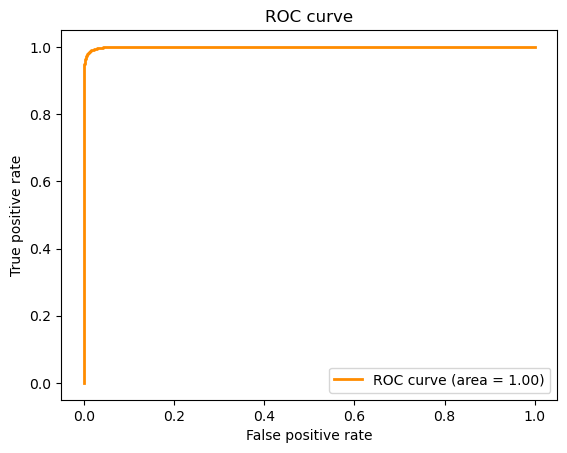

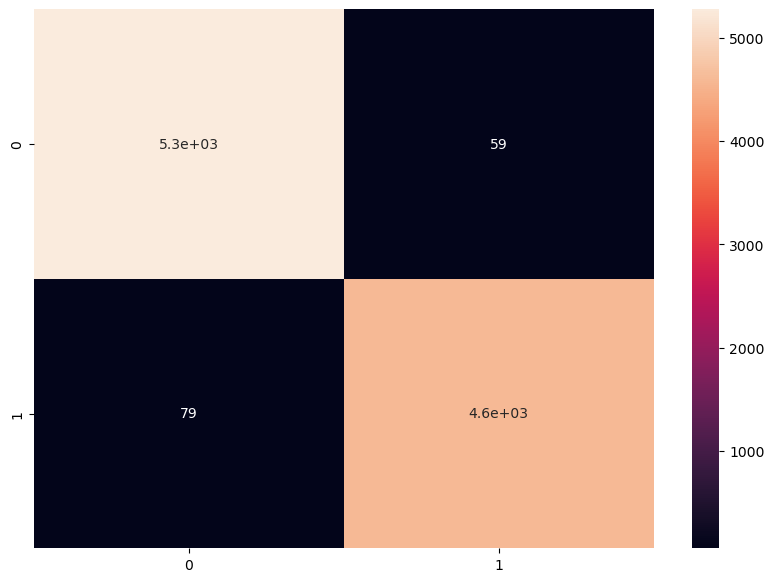

Error rate separable:  1.38


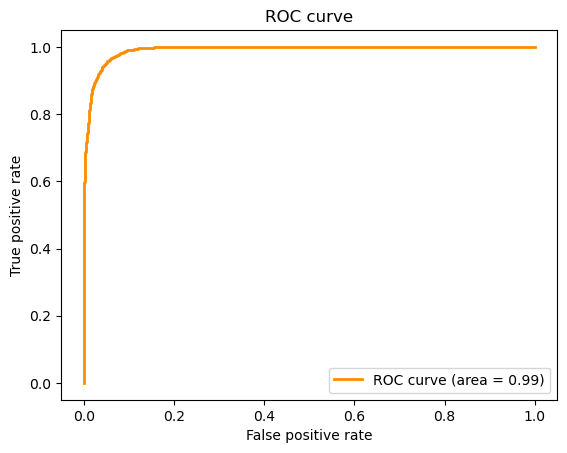

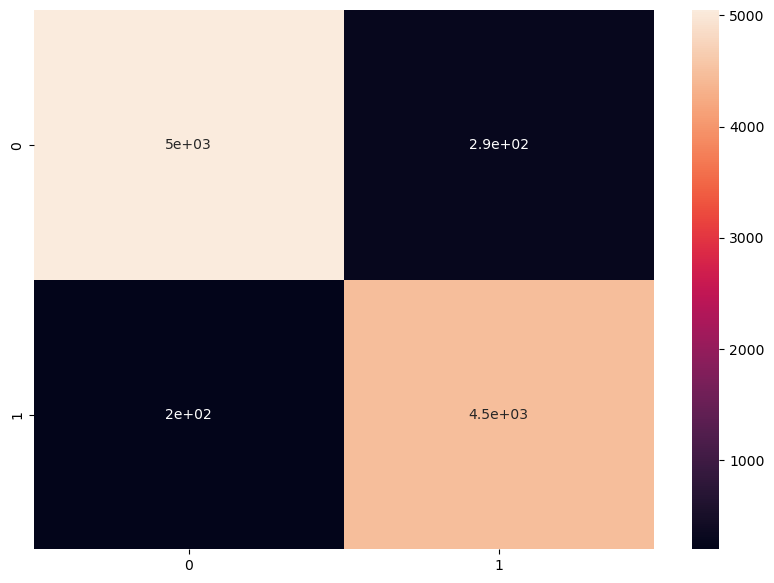

Error rate merged:  4.87


In [21]:
# Use the best model for prediction on the test set
y_pred_separable = best_model_separable.predict_proba(X_test)[:, 1]
y_pred_merged = best_model_merged.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_separable)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# Use the best model for prediction on the test set
y_pred_separable = best_model_separable.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_separable)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.show()

# Compute classification error percentage
error_rate = 100 * (cm[0, 1] + cm[1, 0]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print('Error rate separable: ', error_rate)

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_merged)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# Use the best model for prediction on the test set
y_pred_merged = best_model_merged.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_merged)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.show()

# Compute classification error percentage
error_rate = 100 * (cm[0, 1] + cm[1, 0]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print('Error rate merged: ', error_rate)

Visualization of the data (separable)

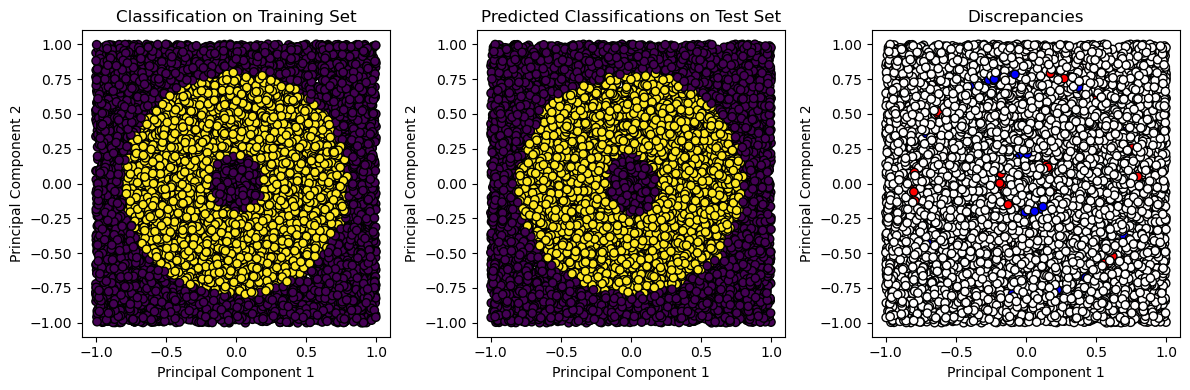

In [22]:
# Plot 1: Classification Dynamics on the Training Set
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(X_train_separable[:, 0], X_train_separable[:, 1], c=y_train_separable, cmap='viridis', edgecolor='k')
plt.title('Classification on Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot 2: Predicted Classifications on the Test Set
plt.subplot(1, 3, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_separable, cmap='viridis', edgecolor='k')
plt.title('Predicted Classifications on Test Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot 3: Discrepancies between Predicted and True Classifications
discrepancies = y_pred_separable - y_test
plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=discrepancies, cmap='bwr', edgecolor='k')
plt.title('Discrepancies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

Visualization of the data (merged)

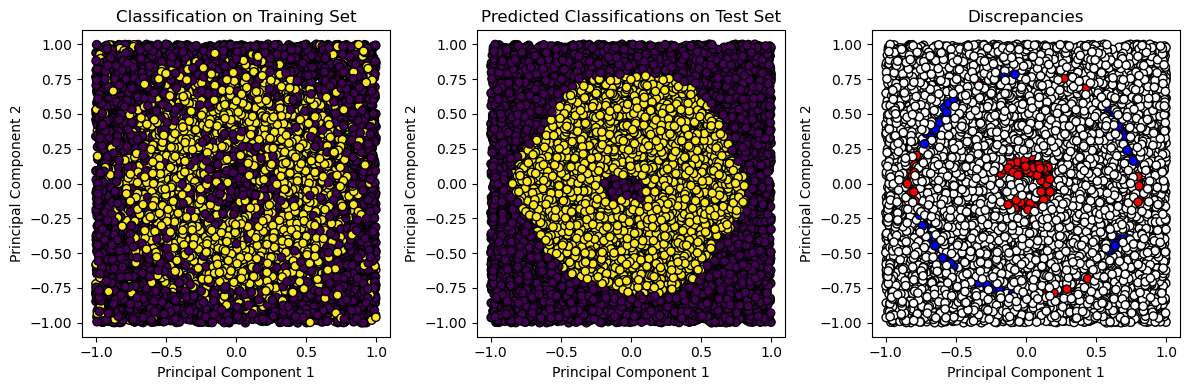

In [23]:
# Plot 1: Classification Dynamics on the Training Set
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(X_train_merged[:, 0], X_train_merged[:, 1], c=y_train_merged, cmap='viridis', edgecolor='k')
plt.title('Classification on Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot 2: Predicted Classifications on the Test Set
plt.subplot(1, 3, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_merged, cmap='viridis', edgecolor='k')
plt.title('Predicted Classifications on Test Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot 3: Discrepancies between Predicted and True Classifications
discrepancies = y_pred_merged - y_test
plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=discrepancies, cmap='bwr', edgecolor='k')
plt.title('Discrepancies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()